In [12]:
!pip install tensorflow==1.15.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
!pip install -q lucid>=0.2.3
!pip install -q moviepy

In [14]:
!pip install imageio==2.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import numpy as np
import json
import moviepy.editor as mvp
from google.colab import files
import tensorflow.compat.v1.gfile as gfile
import lucid.misc.io.showing as show

In [16]:
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 600,600
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


In [17]:
import math
def WritePixel(h,k,x, y):
    gl.glPointSize(2)
    gl.glColor3f(255,0, 0)
    gl.glBegin(gl.GL_POINTS)
    gl.glVertex2f(h+x,k+y)
    gl.glEnd()

def MidpointCircle(h,k,radius):
  d=0.001-radius
  x=0
  y=radius
  Circlepoints(h,k,x,y)
  while(x<y):
    if d<0:
      #E
      d=d+(2*x)+.003
      x+=.001
    else:
      #SE
      d=d+(2*x)-(2*y)+.005
      x+=.001
      y-=.001
    Circlepoints(h,k,x,y)

#insidecircles
def insidecircle(h,k,radius):
  MidpointCircle(h+(radius/2),k,radius/2)
  MidpointCircle(h-(radius/2),k,radius/2)
  MidpointCircle(h,k+(radius/2),radius/2)
  MidpointCircle(h,k-(radius/2),radius/2)

  point=math.sqrt((radius**2)/8)
  MidpointCircle(h+point,k+point,radius/2)
  MidpointCircle(h-point,k+point,radius/2)
  MidpointCircle(h-point,k-point,radius/2)
  MidpointCircle(h+point,k-point,radius/2)
  
def Circlepoints(h,k,x,y):
  WritePixel(h,k,x,y)
  WritePixel(h,k,y,x)
  WritePixel(h,k,y,-x)
  WritePixel(h,k,x,-y)
  WritePixel(h,k,-x,-y)
  WritePixel(h,k,-y,-x)
  WritePixel(h,k,-y,x)
  WritePixel(h,k,-x,y)


gl.glClear(gl.GL_COLOR_BUFFER_BIT)
MidpointCircle(0.1,0.1,0.5)
insidecircle(0.1,0.1,0.5)




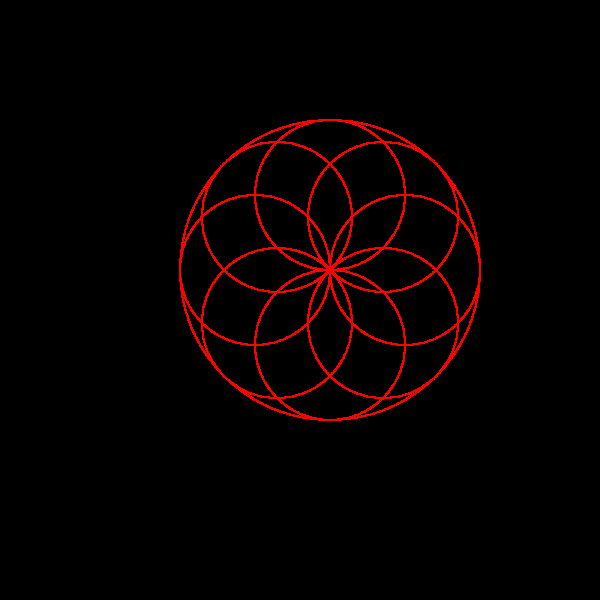

In [18]:
img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)